In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#data['Sex'] = data['Sex'].map({'male' : '1', 'female' : '0'})

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


**Age and Sex**

C:\Users\Denys\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Denys\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Denys\Anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

Text(0.5, 1.0, 'Male')

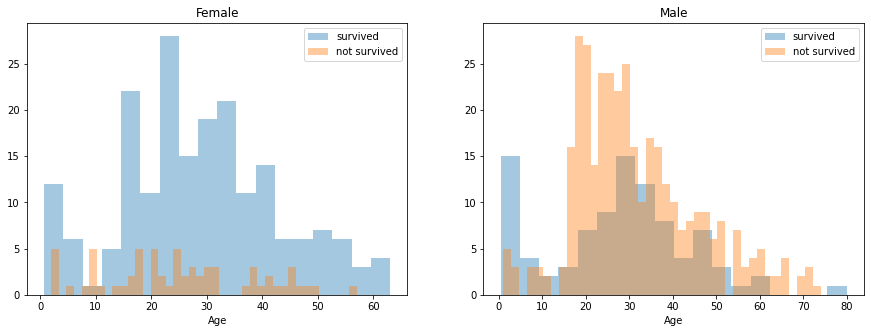

In [8]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
women = data[data['Sex']=='female']
men = data[data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

**Embarked, Pclass  and Sex:**

C:\Users\Denys\Anaconda3\envs\tf\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


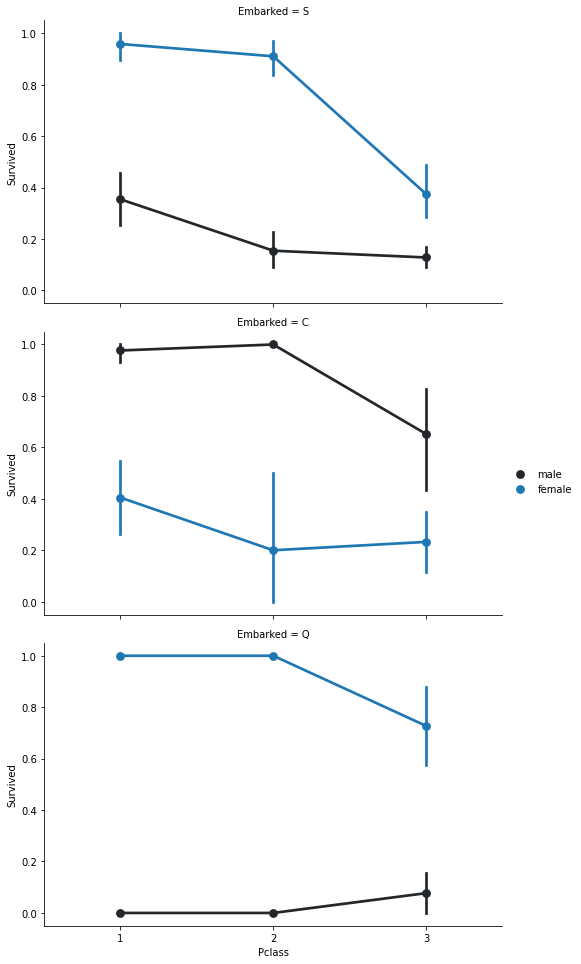

In [9]:
FacetGrid = sns.FacetGrid(data, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

**P-class**

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

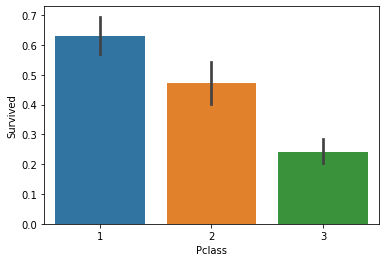

In [10]:
sns.barplot(x='Pclass', y='Survived', data=data)

In [11]:
data_for = [data]
for dataset in data_for:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [13]:
data.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [14]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,1,0,3,male,22.0,1,0,7.2500,S,1,0
1,2,1,1,female,38.0,1,0,71.2833,C,1,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,1,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,1


In [15]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
common_value = 'S'
data_for = [data]

for dataset in data_for:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [17]:
embarked = {"S": 1, "C": 2, "Q": 3}
data_for = [data]

for dataset in data_for:
    dataset['Embarked'] = dataset['Embarked'].map(embarked)

In [18]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
relatives        0
not_alone        0
dtype: int64

In [19]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,1,0,3,male,22.0,1,0,7.2500,1,1,0
1,2,1,1,female,38.0,1,0,71.2833,2,1,0
2,3,1,3,female,26.0,0,0,7.9250,1,0,1
3,4,1,1,female,35.0,1,0,53.1000,1,1,0
4,5,0,3,male,35.0,0,0,8.0500,1,0,1


In [20]:
data['Sex'] = data['Sex'].map({'male' : '1', 'female' : '0'})

In [21]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,1,0,3,1,22.0,1,0,7.2500,1,1,0
1,2,1,1,0,38.0,1,0,71.2833,2,1,0
2,3,1,3,0,26.0,0,0,7.9250,1,0,1
3,4,1,1,0,35.0,1,0,53.1000,1,1,0
4,5,0,3,1,35.0,0,0,8.0500,1,0,1


In [22]:
data['Age'].nunique()

88

In [23]:
data_for = [data]

for dataset in data_for:
    mean = data["Age"].mean()
    std = data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = data["Age"].astype(int)

In [24]:
data_for = [data]
for dataset in data_for:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [25]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,1,0,3,1,2,1,0,7.2500,1,1,0
1,2,1,1,0,5,1,0,71.2833,2,1,0
2,3,1,3,0,3,0,0,7.9250,1,0,1
3,4,1,1,0,5,1,0,53.1000,1,1,0
4,5,0,3,1,5,0,0,8.0500,1,0,1


In [26]:
data_for = [data]

for dataset in data_for:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [27]:
data_for = [data]

for dataset in data_for:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [28]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,1,0,3,1,2,1,0,0,1,1,0
1,2,1,1,0,5,1,0,3,2,1,0
2,3,1,3,0,3,0,0,0,1,0,1
3,4,1,1,0,5,1,0,3,1,1,0
4,5,0,3,1,5,0,0,1,1,0,1


In [29]:
data.drop(['PassengerId'], axis = 1, inplace = True)

In [30]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,0,3,1,2,1,0,0,1,1,0
1,1,1,0,5,1,0,3,2,1,0
2,1,3,0,3,0,0,0,1,0,1
3,1,1,0,5,1,0,3,1,1,0
4,0,3,1,5,0,0,1,1,0,1


In [31]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'relatives', 'not_alone'],
      dtype='object')

In [32]:
data['Sex'] = data['Sex'].astype(int)

In [33]:
X = data[['Survived', 'Pclass','Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'relatives', 'not_alone']]

In [34]:
y = data['Sex']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape

(712, 9)

In [37]:
y_train.shape

(712,)

<AxesSubplot:ylabel='Frequency'>

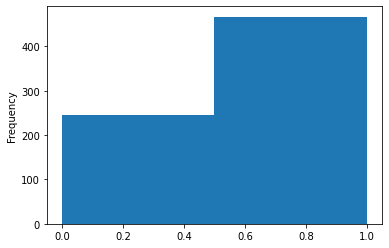

In [38]:
y_train.plot(kind = 'hist', bins = 2)

<AxesSubplot:ylabel='Frequency'>

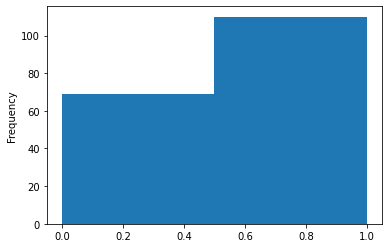

In [39]:
y_test.plot(kind = 'hist', bins = 2)

**Random forest classificator**

In [40]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

90.73 %


**Cross validation**

In [41]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")

In [42]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.79166667 0.72222222 0.77464789 0.85915493 0.85915493 0.74647887
 0.78873239 0.8028169  0.81690141 0.85915493]
Mean: 0.8020931142410015
Standard Deviation: 0.04527772639269839


**Feature importance**

In [43]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [44]:
importances.head(15)

,importance
feature,
Survived,0.327
Age,0.194
Fare,0.141
relatives,0.077
Embarked,0.069
Pclass,0.066
SibSp,0.048
Parch,0.046
not_alone,0.032


<AxesSubplot:xlabel='feature'>

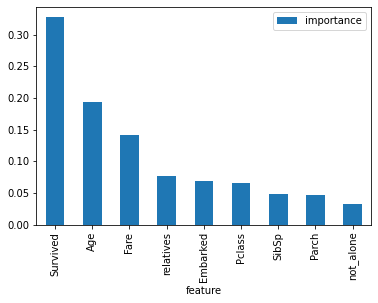

In [45]:
importances.plot.bar()

In [46]:
X_train.drop(['not_alone'], axis = 1, inplace = True)
#y_train.drop(['not_alone'], axis = 1, inplace = True)
X_test.drop(['not_alone'], axis = 1, inplace = True)

C:\Users\Denys\Anaconda3\envs\tf\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

90.73 %


In [48]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

#predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
confusion_matrix(y_test, Y_prediction)

array([[47, 22],
       [21, 89]], dtype=int64)

In [49]:
print(classification_report(y_test, Y_prediction))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69        69
           1       0.80      0.81      0.81       110

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



In [50]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, Y_prediction)

0.7597765363128491

TENSORFLOW

In [51]:
#1231321

In [52]:
X_1 = data[['Survived', 'Pclass','Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'relatives']]

In [53]:
y_1 = data['Sex']

In [54]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
model = Sequential()


model.add(Dense(units=8,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=4,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [63]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [64]:
model.fit(x=X_train_1, 
          y=y_train_1, 
          epochs=600,
          validation_data=(X_test_1, y_test_1), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
23/23 [==============================] - 0s 6ms/step - loss: 0.7672 - val_loss: 0.7201
Epoch 2/600
23/23 [==============================] - 0s 1ms/step - loss: 0.7647 - val_loss: 0.6902
Epoch 3/600
23/23 [==============================] - 0s 1ms/step - loss: 0.7316 - val_loss: 0.6720
Epoch 4/600
23/23 [==============================] - 0s 1ms/step - loss: 0.7103 - val_loss: 0.6584
Epoch 5/600
23/23 [==============================] - 0s 2ms/step - loss: 0.6728 - val_loss: 0.6473
Epoch 6/600
23/23 [==============================] - 0s 1ms/step - loss: 0.6692 - val_loss: 0.6348
Epoch 7/600
23/23 [==============================] - 0s 1ms/step - loss: 0.6660 - val_loss: 0.6262
Epoch 8/600
23/23 [==============================] - 0s 1ms/step - loss: 0.6340 - val_loss: 0.6177
Epoch 9/600
23/23 [==============================] - 0s 1ms/step - loss: 0.6327 - val_loss: 0.6121
Epoch 10/600
23/23 [==============================] - 0s 1ms/step - loss: 0.6269 - val_loss: 0.6067
Epoch 11/

In [65]:
predictions = model.predict_classes(X_test_1)

In [66]:
print(classification_report(y_test_1,predictions))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        69
           1       0.83      0.82      0.83       110

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [67]:
accuracy_score(y_test_1, predictions)

0.7877094972067039